# R kernel

In [4]:
suppressMessages({
library(ggplot2)
library(dplyr)
library(tidyr)
library(ggpubr)
library(cowplot)
library(gridExtra)
library(rstatix)
library(reshape2)
library(ggnewscale)
library(RColorBrewer)
library(ComplexHeatmap)
library(SeuratDisk)
library(Seurat)
library(viridis)
}) 

## Fig.S11A

In [38]:
KC_res = readRDS("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Pub_data/GSE182825/SpatialDecon_KC_result.rds")

In [34]:
KC_result = KC_res$cell.counts$cell.counts
KC_result_ordered <- KC_result[KC_celltype_order,]
KC_result_ordered[KC_result_ordered > 100] <- 100

In [79]:
group_color = c('HC' = '#d05204', 'DLE' = '#019167', 'SLE' = '#0166aa')
groups <- rep(c("HC","DLE","SLE"), c(2,5,3))

top_annotation = HeatmapAnnotation(
    Group = groups, 
    simple_anno_size = unit(3, 'mm'), 
    col = list("Group" = group_color),
    annotation_name_side = "left",
    annotation_name_gp = gpar(fontsize = 5),
    annotation_legend_param = list(
        Group = list(
            title_gp = gpar(fontsize = 5), 
            labels_gp = gpar(fontsize = 5),
            grid_height = unit(3,'mm'),
            grid_width = unit(3,'mm')
        )
    )
) 

png 
  2

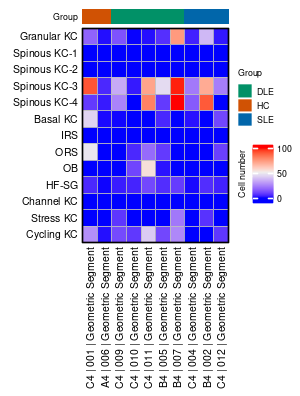

In [82]:
plot = Heatmap(KC_result_ordered,cluster_rows = F, #col = viridis(100),
    cluster_columns = F, 
    heatmap_legend_param = list(
        legend_height = unit(1.2, "cm"),
        legend_width = unit(1, "cm"),
        title = "Cell number",
        title_position = "leftcenter-rot",
        title_gp=gpar(fontsize=5),
        labels_gp=gpar(fontsize=5)         
    ),
    row_names_gp = gpar(fontsize = 6),
    column_names_gp = gpar(fontsize = 6),
    row_names_side = 'left',
    top_annotation = top_annotation,
    border = TRUE,
    border_gp = gpar(col = "black"),
    rect_gp = gpar(col = "gray", lwd = 0.5)
)

options(repr.plot.width =2.5,repr.plot.height =3.3)
draw(plot, merge_legend = TRUE)

pdf("../../figures/Pub_data_SLE_KC_cell_spatialdecon.pdf",w=2.5,h=3.3)
draw(plot, merge_legend = TRUE)
dev.off()

## Fig.S11B

In [73]:
Der_TLS_score = read.table("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Pub_data/GSE182825/Der_TLS_gsva_score_temp.xls",head=T,sep="\t",check.names=F)

In [83]:
group_color = c('HC' = '#d05204', 'DLE' = '#019167', 'SLE' = '#0166aa')
groups <- rep(c("HC","DLE","SLE"), c(1,4,3))

top_annotation = HeatmapAnnotation(
    Group = groups, 
    simple_anno_size = unit(3, 'mm'), 
    col = list("Group" = group_color),
    annotation_name_side = "left",
    annotation_name_gp = gpar(fontsize = 5),
    annotation_legend_param = list(
        Group = list(
            title_gp = gpar(fontsize = 5), 
            labels_gp = gpar(fontsize = 5),
            grid_height = unit(3,'mm'),
            grid_width = unit(3,'mm')
        )
    )
) 

Warning message:
“The input is a data frame-like object, convert it to a matrix.”
Warning message:
“`legend_height` you specified is too small, use the default minimal
height.”
Warning message:
“`legend_height` you specified is too small, use the default minimal
height.”
Warning message:
“`legend_height` you specified is too small, use the default minimal
height.”
Warning message:
“`legend_height` you specified is too small, use the default minimal
height.”
Warning message:
“`legend_height` you specified is too small, use the default minimal
height.”
Warning message:
“`legend_height` you specified is too small, use the default minimal
height.”


png 
  2

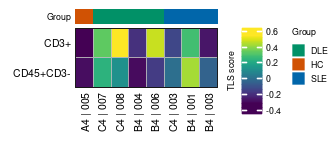

In [84]:
plot = Heatmap(Der_TLS_score,cluster_rows = F, 
    cluster_columns = F,
    col = viridis(100), 
    heatmap_legend_param = list(
        legend_height = unit(1.2, "cm"),
        legend_width = unit(1, "cm"),
        title = "TLS score",
        title_position = "leftcenter-rot",
        title_gp=gpar(fontsize=5),
        labels_gp=gpar(fontsize=5)         
    ),
    row_names_gp = gpar(fontsize = 6),
    column_names_gp = gpar(fontsize = 6),
    border = TRUE,
    top_annotation = top_annotation,
    border_gp = gpar(col = "black", lwd=0.5),
    rect_gp = gpar(col = "gray", lwd = 0.5),
    row_names_side = 'left',
    column_gap = unit(0, "mm"),
    column_title = NULL       
)

options(repr.plot.width =2.8,repr.plot.height =1.2)
plot

pdf("../../figures/Pub_data_SLE_Der_TLS_score.pdf", w=2.8, h=1.2)
plot
dev.off()

## Fig.S11C

In [39]:
Immune_res = readRDS("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Pub_data/GSE182825/SpatialDecon_Immune_result.rds")

In [41]:
Tcells_celltype_order = c("Tn","Tm","Trm","Treg","Tph/Tfh","T_STR","Tc","γδT")
Bcells_celltype_order = c("Bn","B_ATM","B_STR","B_GC","Plasma")
Myeloid_celltype_order = c("Mac_Mono","Mac_C1Q","Mac_RT","Mac_IFN","cDC 1","cDC 2A","cDC 2B","pDC",'mDC',"LC")
immune_cell = c(Tcells_celltype_order, Bcells_celltype_order, Myeloid_celltype_order)

In [42]:
Immune_result = Immune_res$cell.counts$cell.counts
Immune_result_ordered <- Immune_result[immune_cell,]
Immune_result_ordered[Immune_result_ordered > 60] <- 60

In [85]:
group_color = c('HC' = '#d05204', 'DLE' = '#019167', 'SLE' = '#0166aa')
groups <- rep(c("HC","DLE","SLE"), c(1,4,3))
groups2 <- rep(groups, times = 2)

top_annotation = HeatmapAnnotation(
    Group = groups2, 
    simple_anno_size = unit(3, 'mm'), 
    col = list("Group" = group_color),
    annotation_name_side = "left",
    annotation_name_gp = gpar(fontsize = 5),
    annotation_legend_param = list(
        Group = list(
            title_gp = gpar(fontsize = 5), 
            labels_gp = gpar(fontsize = 5),
            grid_height = unit(3,'mm'),
            grid_width = unit(3,'mm')
        )
    )
) 

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδT' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδT' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδT' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδT' in 'mbcsToSbcs': dot substituted for <b4>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδT' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδT' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label

png 
  2

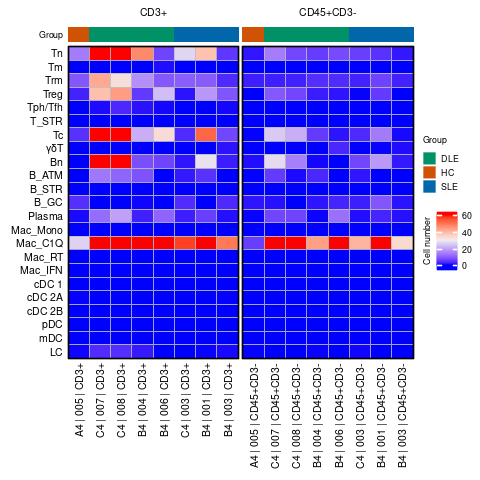

In [86]:
plot = Heatmap(Immune_result_ordered,
    cluster_rows = F,
    cluster_columns = F,
    heatmap_legend_param = list(
        legend_height = unit(1.2, "cm"),
        legend_width = unit(1, "cm"),
        title = "Cell number",
        title_position = "leftcenter-rot",
        title_gp=gpar(fontsize=5),
        labels_gp=gpar(fontsize=5)         
    ),
    row_names_gp = gpar(fontsize = 6),
    column_names_gp = gpar(fontsize = 6),
    row_names_side = 'left',
    border = TRUE,
    top_annotation = top_annotation,
    border_gp = gpar(col = "black"),
    rect_gp = gpar(col = "gray", lwd = 0.5),
    column_split = factor(rep(c("CD3+", "CD45+CD3-"), c(8, 8)),levels = c("CD3+", "CD45+CD3-")),
    column_title_gp = gpar(fontsize = 6)
)

options(repr.plot.width =4,repr.plot.height =4)
draw(plot, merge_legend = TRUE)

pdf("../../figures/Pub_data_SLE_immune_cell_spatialdecon.pdf",w=4,h=4)
draw(plot, merge_legend = TRUE)
dev.off()